In [1]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
#import numpy as np 
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import random
import pickle # For saving models
import pandas as pd # Deal with csv files
import numpy as np # Deal with numerical arrays
import matplotlib.pyplot as plt # Plotting
from imblearn.over_sampling import BorderlineSMOTE
# All scikit-learn packages we need
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from math import sqrt

# Plotting tool build on matplotlib
import seaborn as sns

from joblib import dump
from collections import Counter

In [2]:
# Read dataa
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')

In [3]:
X.fillna(0,inplace=True)

In [4]:
Y.fillna(0,inplace=True)

In [5]:
# Drop Data_id id in axis 1 and inplace it
# We don't need these columns because we don't need it in training
X.drop(['Data_id', 'id'], axis=1, inplace=True)

# Same for Y
Y.drop('Data_ID', axis=1, inplace=True)

# Slice 100000 data from the dataset
X = X[:100000]
Y = Y[:100000]

# Create the full data that includes X and Y
full = X.T.append(Y.T).T

# Feature Selection

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:629: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(self.transform(X), y)


Optimal number of features : 15
Ranking [ 1  1  1 21  1  5 22 13 53 68 18 62 82  7 67 32 28 65 43 44 69 10 83 24
 71  1  1  1  1  1  1 11  1  1  1  1  1 75 81 72 78 61 25 63 47 66 54 15
 27 23 59 42  3  6  8 60 56 49 37 16  4 17 76 77 14  9 31 38 55 26 58 36
 52 64 48 40 46 35 33 41 30 45 34 80 79 73 50 39 51 70 74 20 19 12 29 57
  2]
Best features : Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low'],
      dtype='object')


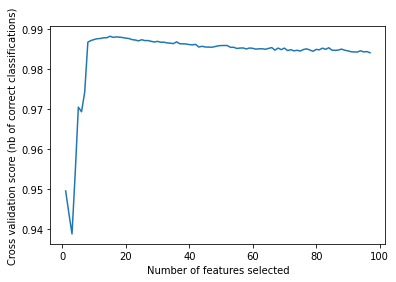

In [9]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(2),
              scoring=metrics.make_scorer(f1_score, average='weighted'),
              min_features_to_select=min_features_to_select)
rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking %s" % rfecv.ranking_) # 重要程度排名
print('Best features :', X.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

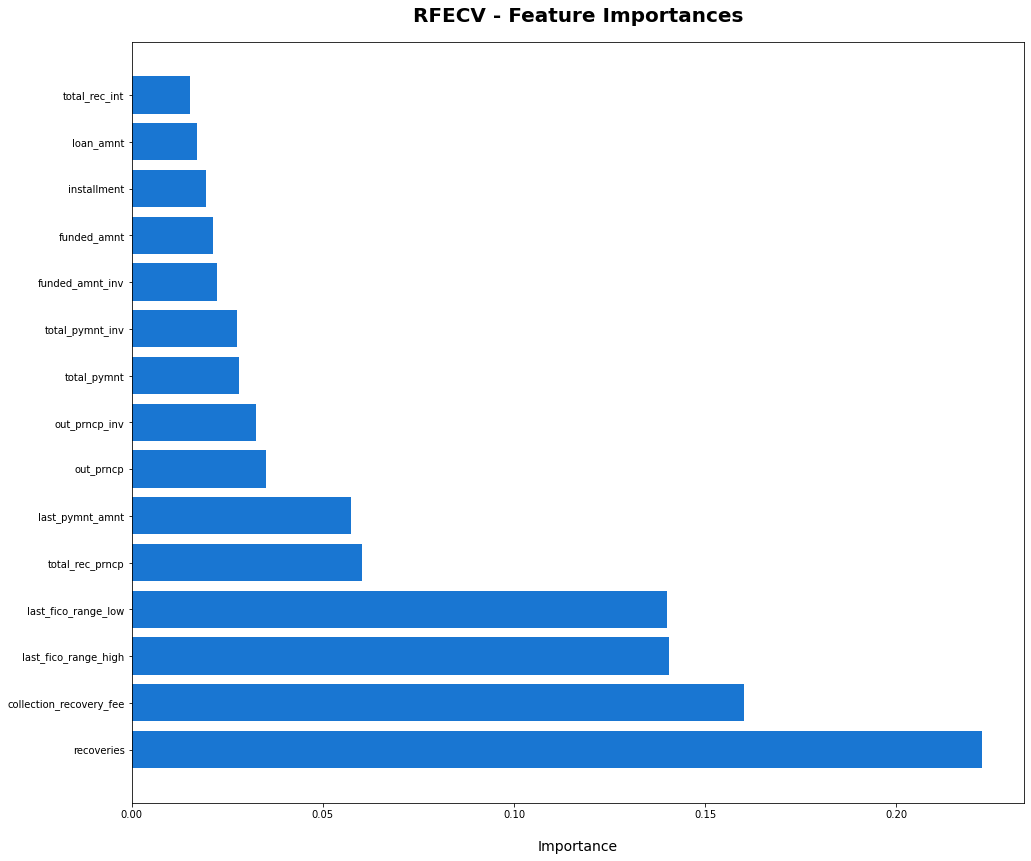

In [10]:
dset = pd.DataFrame()
dset['attr'] = X.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [38]:
rfecv.n_features_
X=rfecv.transform(X)

# Data Conversion

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE

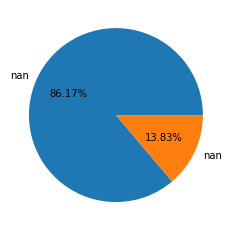

In [41]:
plt.axes(aspect = 'equal')
counts = full.loan_status.value_counts()
plt.pie(x = counts,
        labels=pd.Series(counts.index).map({'0':'未違約','1':'違約'}),
        autopct='%.2f%%'
       )

plt.show()

In [42]:
predictors = full.columns[:-1]

X_train,X_test,y_train,y_test = model_selection.train_test_split(full[predictors], full.loan_status, random_state=12)

In [43]:
from imblearn.over_sampling import BorderlineSMOTE
#over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = BorderlineSMOTE(random_state=42, kind='borderline-1').fit_resample(X_train, y_train)
#over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

In [44]:
print(y_train.value_counts()/len(y_train))

print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

0.0    0.861907
1.0    0.138093
Name: loan_status, dtype: float64
0.0    0.5
1.0    0.5
Name: loan_status, dtype: float64


Optimal number of features : 23


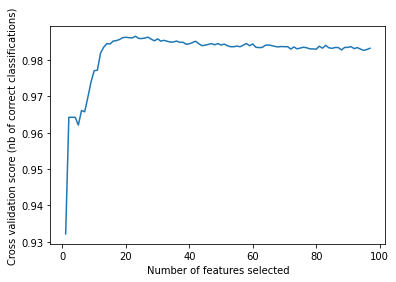

In [37]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(2),
              scoring=metrics.make_scorer(f1_score, average='weighted'),
              min_features_to_select=min_features_to_select)
rfecv.fit(over_samples_X, over_samples_y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [39]:
# Cast Y to a np array
Y = np.array(Y.loan_status)
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [ ]:
plt.axes(aspect = 'equal')
counts = full.loan_status.value_counts()
plt.pie(x = counts,
        labels=pd.Series(counts.index).map({'0':'未違約','1':'違約'}),
        autopct='%.2f%%'
       )

plt.show()

In [ ]:
predictors = full.columns[:-1]

X_train,X_test,y_train,y_test = model_selection.train_test_split(full[predictors], full.loan_status, random_state=12)

In [ ]:

over_samples = SMOTE(random_state=1234) 
#over_samples_X,over_samples_y = BorderlineSMOTE(random_state=42, kind='borderline-1').fit_resample(X_train, y_train)
over_samples_X,over_samples_y = over_samples.fit_resample(X_train, y_train)

In [45]:
print(y_train.value_counts()/len(y_train))

print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

0.0    0.861907
1.0    0.138093
Name: loan_status, dtype: float64
0.0    0.5
1.0    0.5
Name: loan_status, dtype: float64


In [6]:
# Declare the Classifier
# If we don't give the iteration a limit it's going to take a ling time
classifier = RandomForestClassifier()  #hyperperameter

In [8]:
#Make pipeline of clf
clf_pipeline = make_pipeline(classifier)
y_pred = cross_val_predict(clf_pipeline,X, Y, cv=10)
print('Accuracy score:', metrics.accuracy_score(Y, y_pred))
print('Recall score:', metrics.recall_score(Y, y_pred))
print('Fbeta score:', fbeta_score(Y, y_pred, beta=1.5))
print('F1-score:', f1_score(Y, y_pred))

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

Accuracy score: 0.98608
Recall score: 0.9018728758406248
Fbeta score: 0.929204706313865
F1-score: 0.9471445929526126


# Training

In [9]:
# Splitting the trainset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Declare the model
model = classifier

# Cross_val_score(fbeta)
scoring = cross_val_score(model, x_train, y_train, cv=5, 
                          scoring=metrics.make_scorer(f1_score, average='weighted'))
print('Cross_val_score(mean):', scoring.mean())
print('Corss_val_score(std):', scoring.std())

# Fitting trainset
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Showing Score
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('fbeta:', metrics.fbeta_score(y_test, y_pred, beta=1.5))
print('F1-score:', metrics.f1_score(y_test, y_pred))

C:\Users\a0975\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\a0975\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

Cross_val_score(mean): 0.9852059523610126
Corss_val_score(std): 0.00036032228889395086


<ipython-input-9-e5049220b2be>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


Accuracy: 0.98565
Recall: 0.8945986496624156
fbeta: 0.9239227605935992
F1-score: 0.9432469843780897


# Testing

In [10]:
# Create the testset, using the rest of the data for testing
# Do the same thing with the trainset
test_X = pd.read_csv('x_train.csv')
test_Y = pd.read_csv('y_train.csv')
test_X.drop(['Data_id', 'id'], axis=1, inplace=True)
test_Y.drop('Data_ID', axis=1, inplace=True)
test_X = test_X[100000:]
test_Y = test_Y[100000:]

In [11]:
test_X.fillna(0,inplace=True)
test_Y.fillna(0,inplace=True)

In [12]:
pred = model.predict(test_X)
#pred = model.predict(rfecv.transform(test_X))
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
# Cast test_Y.loan_status to np array
test_Y = np.array(test_Y.loan_status)

In [14]:
#Showing testing scores
print('Accuracy:', metrics.accuracy_score(test_Y, pred))
print('Recall:', metrics.recall_score(test_Y, pred))
print('fbeta:', metrics.fbeta_score(test_Y, pred, beta=1.5))
print('F1-score:', metrics.f1_score(test_Y, pred))
print('Precision:', metrics.precision_score(test_Y, pred))

Accuracy: 0.9855794217642253
Recall: 0.9000428162581595
fbeta: 0.9277799716602012
F1-score: 0.9460008921557403
Precision: 0.9969049520766773
